Osnabrück University - Computer Vision (Winter Term 2024/25) - Dr. Ulf Krumnack, Lukas Niehaus, Robin Rawiel

# Exercise Sheet 03: Morphological Operations¶

## Introduction

This week's sheet should be solved and handed in before the end of **Monday, December 2, 2024**. If you need help (and Google and other resources were not enough) use the StudIP forum. Please upload your results to your group's Stud.IP folder.

## Assignment 0: Math recap (complex numbers) [0 Points]

This exercise is supposed to be easy, does not give any points, and is voluntary. There may be similar exercises on future sheets. They are intended to revise some basic mathematical notions that are assumed throughout this class and to allow you to check if you are comfortable with them. Usually you should have no problem to answer these questions offhand, but if you feel unsure, this is a good time to look up these concepts (again). You are always welcome to discuss questions with the tutors or in the practice session. Also, if you have a (math) topic you would like to recap, please let us know.

**a)** What is a *complex number*, what is the *complex plane*, how are complex numbers usually denoted?

YOUR ANSWER HERE

**b)** What is the *real* and the *imaginary* part of a complex number? What is the *absolute value* of a complex number? What is the *complex conjugate*?

YOUR ANSWER HERE

**c)** What are polar coordinates? What are their advantages? Can you convert between cartesian and polar coordinates? Can you write down $i=\sqrt{-1}$ in polar coordinates? What about $\sqrt{i}$?

YOUR ANSWER HERE

**d)** Python, and also numpy, support calculations with complex numbers. Consult the documentation to find out details. Notice that $i$ is substituted by $j$ in Python.

In [2]:
# YOUR CODE HERE
# raise NotImplementedError()

NotImplementedError: 

## Assignment 1: Noise and Local Operators (7 points)

In [4]:
import numpy as np
import skimage.data
import imageio.v3 as iio
import matplotlib.pyplot as plt
from scipy.ndimage import convolve

## Getting the Original Image

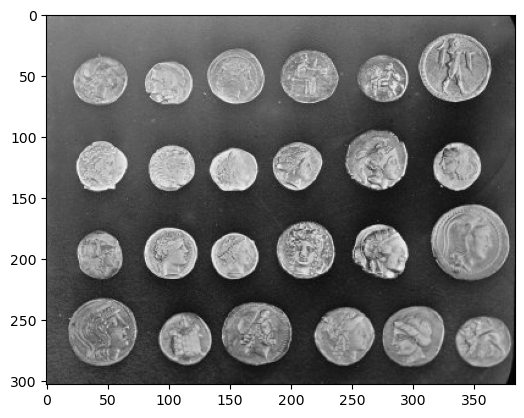

In [6]:
image = skimage.data.coins().astype(np.float64)
plt.imshow(image, cmap="gray")
plt.show()

### a) Salt and Pepper Noise

Add salt and pepper noise to the image.

(303, 384)


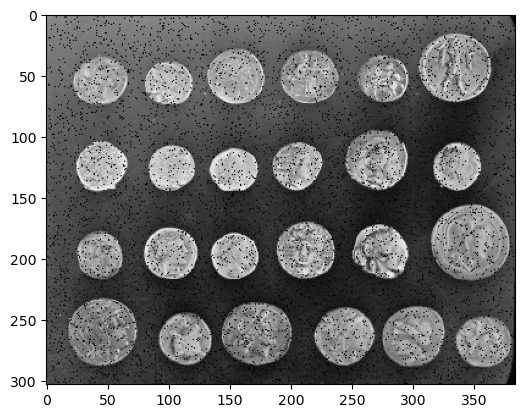

In [7]:
import random

noise_ratio = .05
sp_noisy = image.copy()

num_pixels = image.size
num_noisy_pixels = int(noise_ratio * num_pixels)

salt_indices = np.random.choice(num_pixels, num_noisy_pixels // 2, replace=False)
sp_noisy.ravel()[salt_indices] = 1

pepper_indices = np.random.choice(num_pixels, num_noisy_pixels // 2, replace=False)
sp_noisy.ravel()[pepper_indices] = 0

print(image.shape)
plt.imshow(sp_noisy, cmap="gray")
plt.show()

### b) Gaussian Noise
Add gaussian noise to the image.

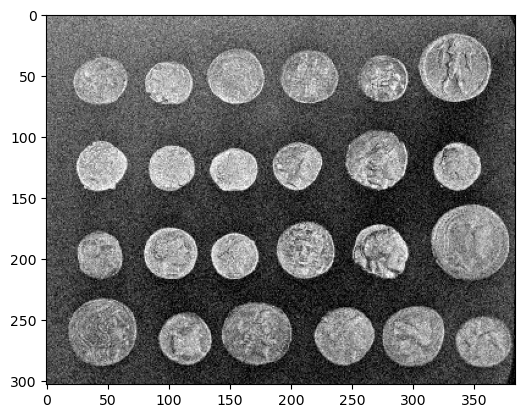

In [8]:
sigma = 20
gauss_noisy = image.copy()
gaussian_noise = np.random.normal(0, sigma, image.shape)
gauss_noisy = gauss_noisy + gaussian_noise
gauss_noisy = np.clip(gauss_noisy,0,255)
plt.imshow(gauss_noisy, cmap="gray")
plt.show()

## c) Define Local Operator
In this exercise you will have to finish the local_operator function (cf. CV-04 p. 14).

The function will receive an image (img), kernel size (kernel_size) and a function as parameters.

For each pixel in the image, it will select a window of surrounding pixels according to the kernel_size.

This window is then passed on to the function as an argument.
The function then stores the result in the same position of the resulting image.
Therefore, the function should look similar to this:
```python
# define the function
def f(data):
    """Function to be applied by the local operator. 
    This example just returns 0.0, i.e. a black image.
    
    Args:
        data (np.ndarray): The window of the image as array. 
            Has the same shape as kernel_size, passed to local_operator.
        
    Returns:
        result (float): The value for the pixel at the same position in the resulting image
    """
    return 0.0

# call the local_operator with the function
local_operator(
    image,
    kernel_size=(1,1), 
    function=f,
)
```

In [9]:
def local_operator(img, kernel_size, function):
    """Execute a local operation on an image.

    Args:
        img (np.ndarray): The image, provided as a two-dimensional array.
        kernel_size (tuple): Shape of the applied window.
        function (function): the function that is applied to the window
        
    Returns:
        result (np.ndarray): The new image after the local operator was applied. 
        
    """
    
    # store the image size for easier access
    M,N = img.shape
    # store the kernel size
    m,n = kernel_size
    # and also the half kernel size
    mh, nh = (m//2, n//2)
    
    padded_img = np.pad(img, ((mh, mh), (nh, nh)), mode='reflect')

    # Initialize the result matrix
    result = np.zeros((M,N), dtype=np.float64)

    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            window = padded_img[i:i + kernel_size[0], j:j + kernel_size[1]]
            result[i, j] = function(window)
    return result


As an example, we provide you with an identity filter, which just returns the original image.

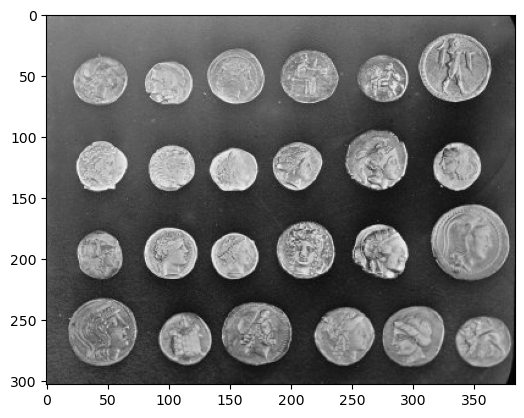

In [10]:
def identity_filter(image):
    return local_operator(
        image,
        kernel_size=(1,1), 
        function=lambda x: x[0][0],
    )
plt.imshow(identity_filter(image), cmap="gray")
plt.show()

### d) Create and apply the following filters:
 - Min Filter (cf. CV-04 slides 23-24)
 - Max Filter (cf. CV-04 slides 23-24)
 - Median Filter (cf. CV-04 slides 25-26)
 - KNN Filter (cf. CV-04 slide 29)
 - SNN Filter (cf. CV-04 slide 30)

Use a kernel_size of `(3, 3)` and for the KNN filter, set K$=4$

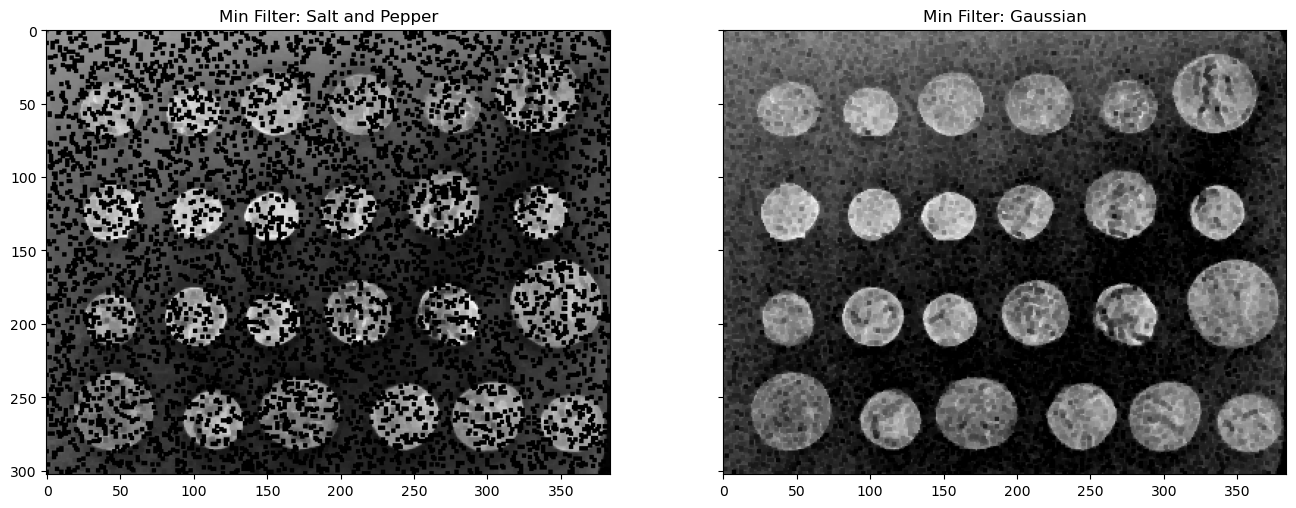

In [11]:
def min_filter(image):
    return local_operator(
        image,
        kernel_size=(3,3), 
        function=lambda x: np.min(x),
    )

    
fig, ax = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(16, 9))

ax[0].imshow(min_filter(sp_noisy), cmap="gray")
ax[0].set_title("Min Filter: Salt and Pepper")

ax[1].imshow(min_filter(gauss_noisy), cmap="gray")
ax[1].set_title("Min Filter: Gaussian")

plt.show()

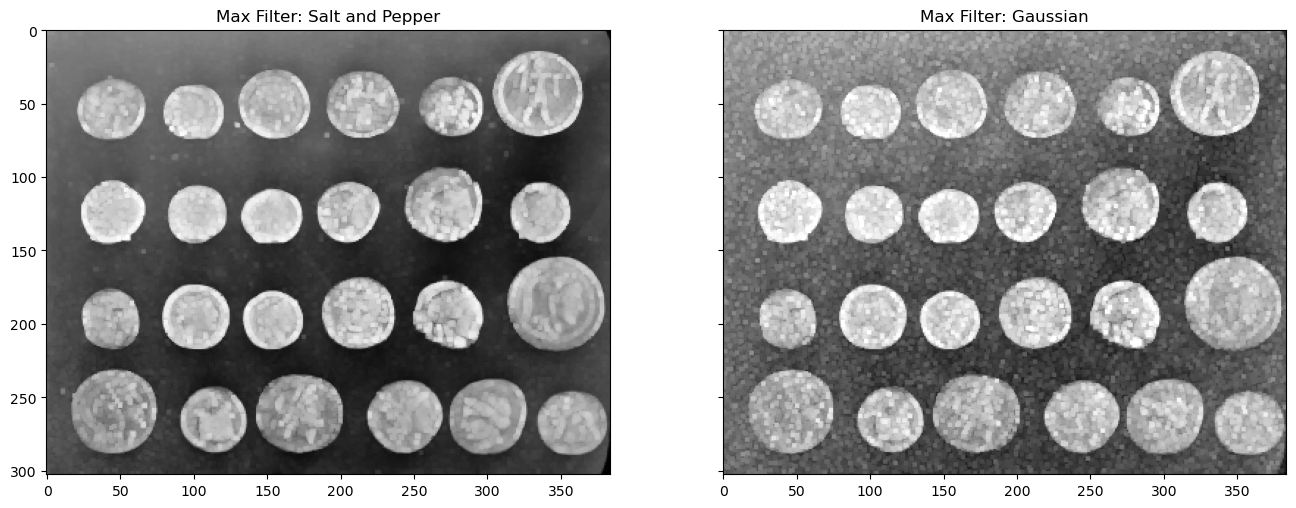

In [12]:
def max_filter(image):
    return local_operator(
        image,
        kernel_size=(3,3), 
        function=lambda x: np.max(x),
    )

fig, ax = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(16, 9))

ax[0].imshow(max_filter(sp_noisy), cmap="gray")
ax[0].set_title("Max Filter: Salt and Pepper")

ax[1].imshow(max_filter(gauss_noisy), cmap="gray")
ax[1].set_title("Max Filter: Gaussian")

plt.show()

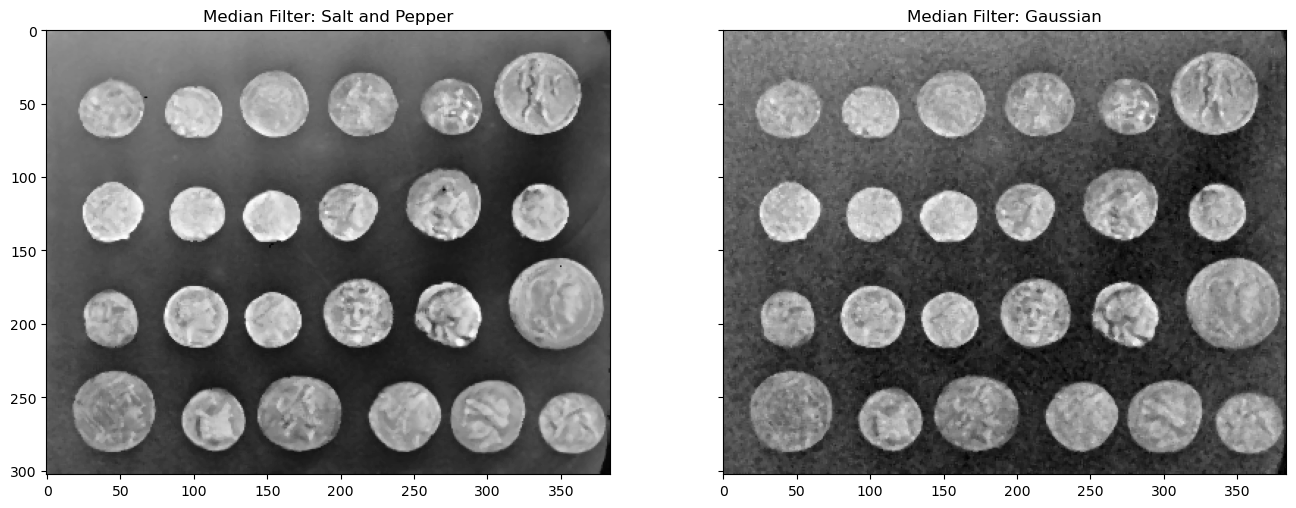

In [13]:
def median_filter(image):
    return local_operator(
        image,
        kernel_size=(3,3), 
        function=lambda x: np.median(x),
    )
fig, ax = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(16, 9))

ax[0].imshow(median_filter(sp_noisy), cmap="gray")
ax[0].set_title("Median Filter: Salt and Pepper")

ax[1].imshow(median_filter(gauss_noisy), cmap="gray")
ax[1].set_title("Median Filter: Gaussian")

plt.show()

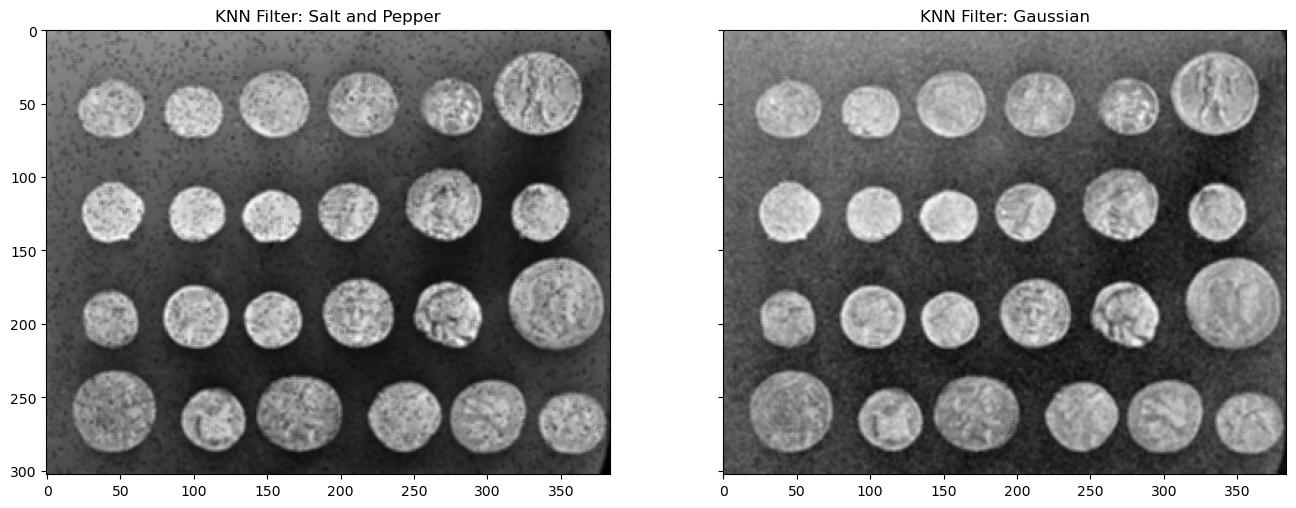

In [14]:
def knn_filter(image, k=4):

    def knn_operator(data):
        distances = np.abs(data - np.median(data))  
        knn = np.argsort(distances)[:k]
        return np.mean(data[knn])
    return local_operator(
            image,
            kernel_size=(3,3), 
            function=knn_operator,
        )
fig, ax = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(16, 9))

ax[0].imshow(knn_filter(sp_noisy), cmap="gray")
ax[0].set_title("KNN Filter: Salt and Pepper")

ax[1].imshow(knn_filter(gauss_noisy), cmap="gray")
ax[1].set_title("KNN Filter: Gaussian")

plt.show()

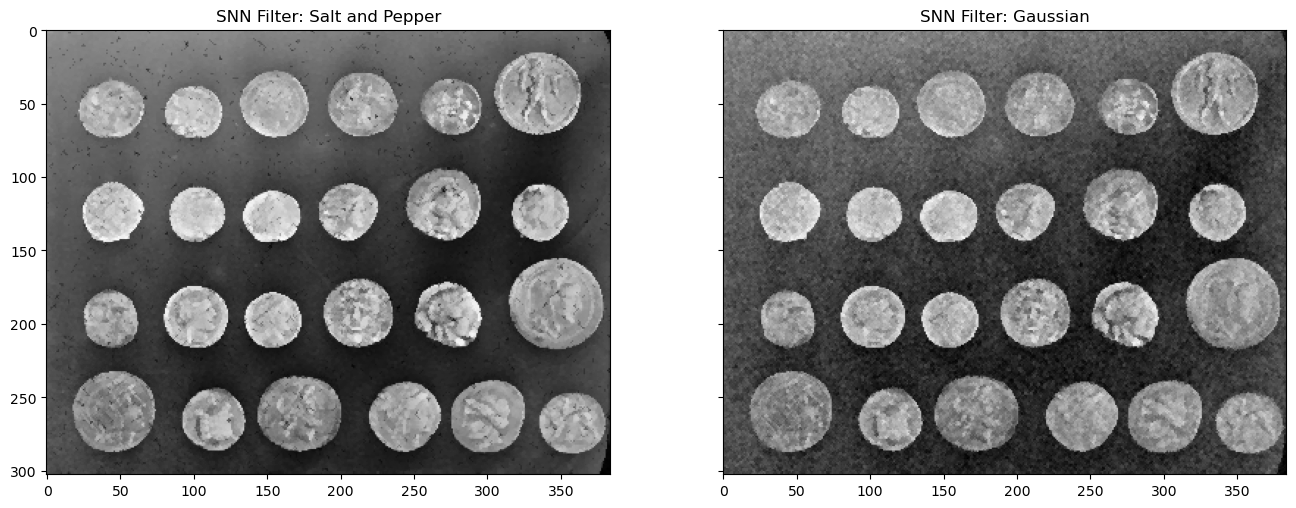

In [15]:
def snn_filter(image):
    def snn_operator(data):
        snn = []
        
        p = data[1, 1]  # The value of the central pixel in the kernel (3x3 window)
        
        pairs = [
            ((0, 0), (2, 2)),  # Top-left and bottom-right
            ((0, 1), (2, 1)),  # Top-center and bottom-center
            ((0, 2), (2, 0)),  # Top-right and bottom-left
            ((1, 0), (1, 2))   # Left-center and right-center
        ]
        
        best_match_pixels = []  
        
        for (i1, j1), (i2, j2) in pairs:
            left_dist = np.abs(data[i1, j1] - p)
            right_dist = np.abs(data[i2, j2] - p)
            
            if left_dist < right_dist:
                best_match_pixels.append(data[i1, j1])
            else:
                best_match_pixels.append(data[i2, j2])

        return np.mean(best_match_pixels)

    return local_operator(image, kernel_size=(3, 3), function=snn_operator)
    
    
fig, ax = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(16, 9))

ax[0].imshow(snn_filter(sp_noisy), cmap="gray")
ax[0].set_title("SNN Filter: Salt and Pepper")

ax[1].imshow(snn_filter(gauss_noisy), cmap="gray")
ax[1].set_title("SNN Filter: Gaussian")

plt.show()

## Assignment 2: Morphological operators (3 points)

This exercise will elaborate on the basic morphological operators of *erosion* and *dilation* (cf. CV-04 slides 35-51).

### a) Morphological operators

Explain in your own words the idea of morphological operators. Describe potential applications.

Search for a pre-defined pattern in the image using a structuring element. The operations of erosion or dilation can be used individually or in a combination and they help in smoothing, removing noise or filling gap.

### b) Erosion and dilation

Describe in your own words the morphological operations *erosion* and *dilation*. Compare them with 2D convolution, name commonalities and differences.

Erosion - Sets a pixel to 0 when the entire pattern is matched and makes the image thinner.
Dilation - Sets a pixel to 1 when a part of the pattern is matched and makes the image thicker.

Similarity to convulation - the structuring element moves across the image like a filter kernal and updates a single pixel(based on anchor point), the value is based on the neighbors
Differences - changes shape of the objects in image vs enhances image features

### c) Structuring element

Erosion of an image $g$ with a structuring element $S$ results in an image $g'$ that is a "subset" of that image (in the sense that all pixels set in $g$ are also set in $g'$) as long as the anchor point is contained in $S$, i.e. covered by a **1** in the structuring element. Provide an example in which the erosion $g'=g\ominus S$ lies outside (or partially outside) of $g$.

YOUR ANSWER HERE

## Assignment 3: Properties of morphological operators (5 points)

This exercise will elaborate on the basic morphological operators of *erosion* and *dilation* (cf. CV-04 slides 35-51).

### a) Duality

Proof that *erosion* and *dilation* are *dual* operators, i.e.

$$ g^{\ast}\oplus S = (g\ominus S)^{\ast}\qquad\text{and}\qquad
g^{\ast}\ominus S = (g\oplus S)^{\ast}$$

here $g^{\ast}$ denotes the inverted binary image, i.e. $g^{\ast}(x,y) = 1 - g(x,y) = \neg g(x,y)$, i.e. 1-pixel become 0 and 0-pixel become 1.

YOUR ANSWER HERE

### b) Superposition

As *erosion* and *dilation* have been introduced for binary images, the notion of *linearity* is not really appropriate here. However, some weaker version, called *superposition* can be defined: instead of forming a linear combination, one takes the logical disjunction:

$$(g_1\lor g_2)(x,y) := g_1(x,y)\lor g_2(x,y)$$

Check for both operations if *erosion* and *dilation* are "compatible" with superposition, i.e. if first *eroding* (or *dilating*) two images and superposing the result is the same as first superposing the images and then *eroding* (or *dilating*) the result.

YOUR ANSWER HERE

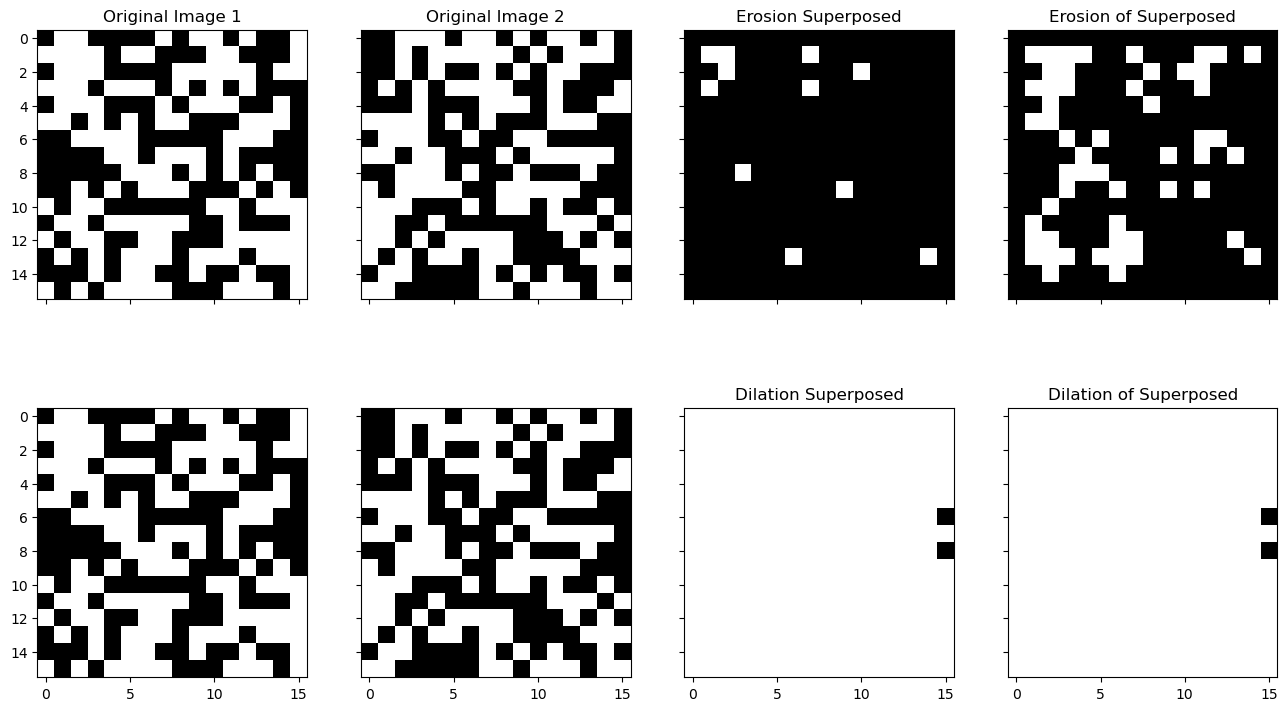

In [28]:
from scipy import ndimage
test_image_1 = np.random.randint(2, size=(16,16)).astype(bool)
test_image_2 = np.random.randint(2, size=(16,16)).astype(bool)

e_1 = ndimage.binary_erosion(test_image_1).astype(bool)
e_2 = ndimage.binary_erosion(test_image_2).astype(bool)

# Perform dilation on individual images
d_1 = ndimage.binary_dilation(test_image_1).astype(bool)
d_2 = ndimage.binary_dilation(test_image_2).astype(bool)

# Superpose the eroded and dilated results
erosion_superposed = e_1 | e_2
dilation_superposed = d_1 | d_2

# Superpose the original images
superposed_image = test_image_1 | test_image_2

# Erode and dilate the superposed image
erosion_of_superposed = ndimage.binary_erosion(superposed_image).astype(bool)
dilation_of_superposed = ndimage.binary_dilation(superposed_image).astype(bool)

# Check compatibility
erosion_compatible = np.array_equal(erosion_superposed, erosion_of_superposed)
dilation_compatible = np.array_equal(dilation_superposed, dilation_of_superposed)

# Plot the results
fig, ax = plt.subplots(2, 4, sharex=True, sharey=True, figsize=(16, 9))
ax[0, 0].imshow(test_image_1, cmap="gray")
ax[0, 0].set_title("Original Image 1")
ax[0, 1].imshow(test_image_2, cmap="gray")
ax[0, 1].set_title("Original Image 2")
ax[0, 2].imshow(erosion_superposed, cmap="gray")
ax[0, 2].set_title("Erosion Superposed")
ax[0, 3].imshow(erosion_of_superposed, cmap="gray")
ax[0, 3].set_title("Erosion of Superposed")

ax[1, 0].imshow(test_image_1, cmap="gray")
ax[1, 1].imshow(test_image_2, cmap="gray")
ax[1, 2].imshow(dilation_superposed, cmap="gray")
ax[1, 2].set_title("Dilation Superposed")
ax[1, 3].imshow(dilation_of_superposed, cmap="gray")
ax[1, 3].set_title("Dilation of Superposed")

plt.show()

### c) Chaining

Show that *dilation* and *erosion* have the following properties: given two structering elements $S_1$ and $S_2$, it holds

\begin{align}
  (g\oplus S_1)\oplus S_2 & & = & g\oplus (S_1\oplus S_2) && = (g\oplus S_2)\oplus S_1 \\
  (g\ominus S_1)\ominus S_2 & & = & g\ominus (S_1\ominus S_2) && = (g\ominus S_2)\ominus S_1 \\  
\end{align}

What are the practical consequences?

image = np.random.randint(2, size=(10, 10)).astype(bool)

S1 = np.ones((3, 3))
S2 = np.ones((3, 3))

dilation_combined = ndimage.binary_dilation(image, structure=S1 + S2)
dilation_separate = ndimage.binary_dilation(ndimage.binary_dilation(image, structure=S1), structure=S2)

print("Dilation commutative:", np.array_equal(dilation_combined, dilation_separate))

erosion_combined = ndimage.binary_erosion(image, structure=S1 + S2)
erosion_separate = ndimage.binary_erosion(ndimage.binary_erosion(image, structure=S1), structure=S2)

print("Erosion commutative:", np.array_equal(erosion_combined, erosion_separate))

Remark: for the argument to work, we have to assume, that images and structuring elements are large enough and zero-padded. Otherwise it is possible to create counter examples like the following:

In [32]:
import numpy as np
from scipy.ndimage import binary_dilation
a =          np.array([[0,0,0,0,0],
                      [0,0,0,0,0],
                      [0,0,1,0,0],
                      [0,0,0,0,0],
                      [0,0,0,0,0]])
b2 =          np.array([[0,0,0,0,0], #for this one the rule holds 
                      [0,1,1,1,0],
                      [0,1,1,1,0],
                      [0,1,1,1,0],
                      [0,0,0,0,0]])
b =          np.array([[1,1,1], #for this one it dosen´t
                      [1,1,1],
                      [1,1,1],])
c = b
c2 = b2
d = np.zeros(c.shape, int)
out1 = np.zeros(a.shape, int)
out2 = np.zeros(a.shape, int)
out1 = binary_dilation(binary_dilation(a,b),c)
out2 = binary_dilation(a,binary_dilation(b,c))

print(out1)
print(out2)

image = np.random.randint(2, size=(10, 10)).astype(bool)

S1 = np.ones((3, 3))
S2 = np.ones((3, 3))

dilation_combined = ndimage.binary_dilation(image, structure=S1 + S2)
dilation_separate = ndimage.binary_dilation(ndimage.binary_dilation(image, structure=S1), structure=S2)

print("Dilation commutative:", np.array_equal(dilation_combined, dilation_separate))

erosion_combined = ndimage.binary_erosion(image, structure=S1 + S2)
erosion_separate = ndimage.binary_erosion(ndimage.binary_erosion(image, structure=S1), structure=S2)

print("Erosion commutative:", np.array_equal(erosion_combined, erosion_separate))

[[ True  True  True  True  True]
 [ True  True  True  True  True]
 [ True  True  True  True  True]
 [ True  True  True  True  True]
 [ True  True  True  True  True]]
[[False False False False False]
 [False  True  True  True False]
 [False  True  True  True False]
 [False  True  True  True False]
 [False False False False False]]
Dilation commutative: False
Erosion commutative: True


## Assignment 4: Custom Structuring Element (5 points)

Landsat 7 was a satelite mission for acquisition of satellite imagery of Earth. Unfortunately the Scan Line Corrector failed, resulting in black stripes on the aquired images. More information: [https://landsat.gsfc.nasa.gov/satellites/landsat-7](https://landsat.gsfc.nasa.gov/satellites/landsat-7)

### a) A first fix

A rather crude fix is to apply a custom structuring element for dilation and erosion (see CV-04, 66ff). Complement the code below (in part (b)) in the following way:
* Rotate the image such that the gaps are horizontal.
* Dilate the rotated image with a vertical structuring element. I.e. take the maximum of an area of size $7 \times1$ and assign it to the center pixel. Repeat for all pixels.
* Erode the dilated image.
* Rotate the result back.

Remark: this exercise applies morphological operator to color images. This extends the idea of generalizing morphological operators to gray value images.  

### b) Improving the solution
You may get better results by thresholding and applying the morphological operations only to pixels below a threshold, i.e. gap pixels. Compliment your solution from a). 

In [33]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import scipy.ndimage as ndimg
from skimage import color
from skimage.transform import rescale as rescale
from imageio.v3 import imread


angle = 15
thresh = .3
struc_elem = np.ones((5,1), dtype=bool)

img = imread("images/landsat_stack2.png")
img2 = img.copy()
img3 = img.copy()

# YOUR CODE HERE
raise NotImplementedError()
img = (img - np.min(img))/np.ptp(img)
img3 = (img3 - np.min(img3))/np.ptp(img3)


plt.figure(figsize=(15,45))
plt.subplot(3,1,1); plt.imshow(img); plt.axis('off')
plt.subplot(3,1,2); plt.imshow(img3); plt.axis('off')
plt.subplot(3,1,3); plt.imshow(thresh_img); plt.axis('off')
plt.imshow(thresh_img)
plt.show()

FileNotFoundError: No such file: 'C:\Users\shubh\Desktop\homework\cv\Sheet03\images\landsat_stack2.png'

### c) Bonus
Can you think of (and implement) other ways to add the missing data? 


YOUR ANSWER HERE

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()